In [2]:
import pandas as pd
df=pd.read_csv("exchange_rate-20.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
df.describe

<bound method NDFrame.describe of                   date   Ex_rate
0     01-01-1990 00:00  0.785500
1     02-01-1990 00:00  0.781800
2     03-01-1990 00:00  0.786700
3     04-01-1990 00:00  0.786000
4     05-01-1990 00:00  0.784900
...                ...       ...
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825

[7588 rows x 2 columns]>

In [4]:
df.isnull()

,date,Ex_rate
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7583,False,False
7584,False,False
7585,False,False
7586,False,False


In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
df = pd.DataFrame({'USD/EUR': range(100)}, index=dates)

In [7]:
currency = 'USD/EUR'

if currency not in df.columns:
    raise KeyError(f"Column '{currency}' not found in the DataFrame. Available columns: {df.columns.tolist()}")

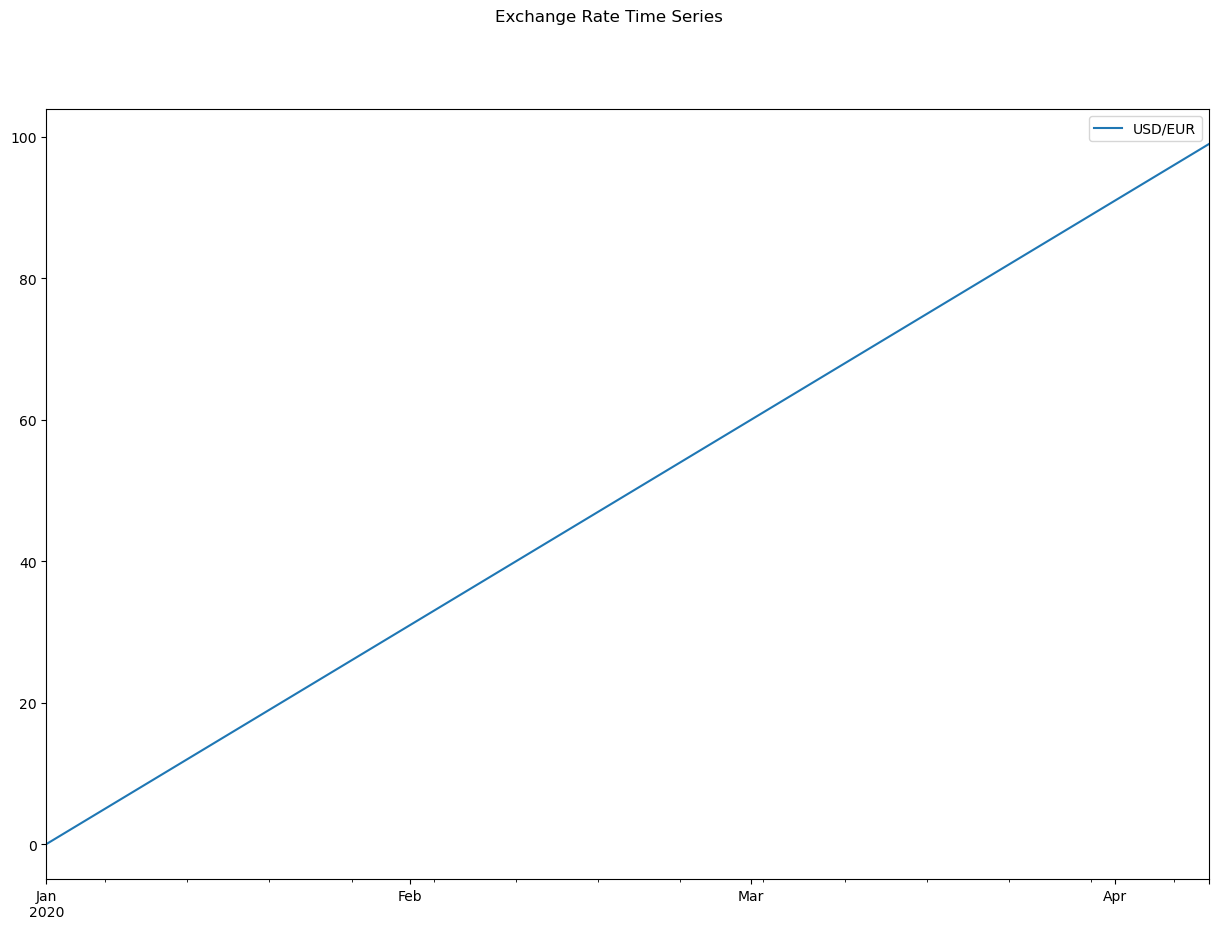

In [8]:
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(15, 10))
plt.suptitle('Exchange Rate Time Series')
plt.show()

In [9]:
p = 1 
d = 1 
q = 1
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Fit the ARIMA model
model = sm.tsa.ARIMA(df[currency], order=(p, d, q))
model_fit = model.fit() 
print(model_fit.summary()) 

                               SARIMAX Results                                
Dep. Variable:                USD/EUR   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 529.392
Date:                Mon, 19 Aug 2024   AIC                          -1052.784
Time:                        22:52:09   BIC                          -1044.999
Sample:                    01-01-2020   HQIC                         -1049.634
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998   4.54e-05    2.2e+04      0.000       1.000       1.000
ma.L1          0.9992   2.23e-10   4.47e+09      0.000       0.999       0.999
sigma2      1.162e-06   2.32e-07      5.004      0.0

C:\Users\gurra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


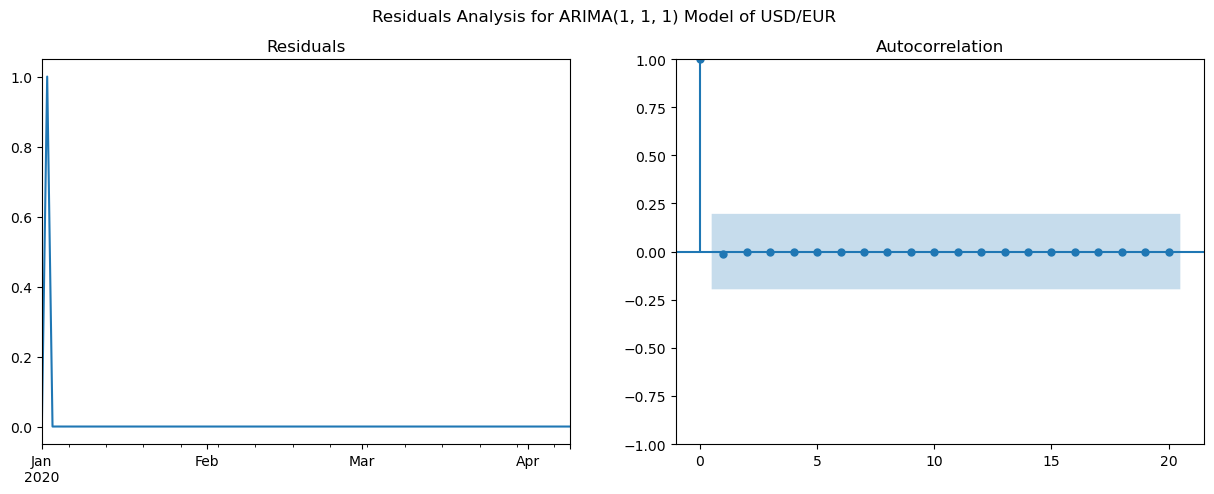

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Diagnostics: plot residuals
residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
residuals.plot(title="Residuals", ax=axes[0])
plot_acf(residuals, ax=axes[1])
plt.suptitle(f'Residuals Analysis for ARIMA({p}, {d}, {q}) Model of {currency}')
plt.show() 

In [11]:
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

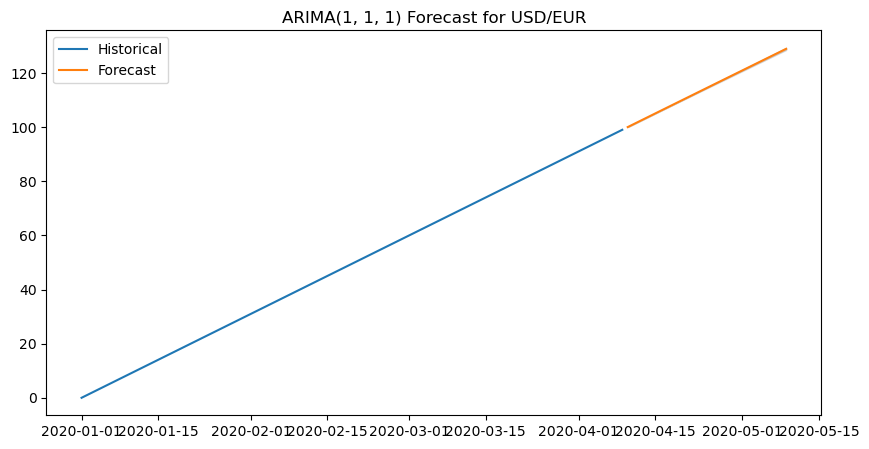

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df[currency], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.legend()
plt.title(f'ARIMA({p}, {d}, {q}) Forecast for {currency}')
plt.show() 

In [ ]:
# The dataset was successfully loaded, and initial exploration included displaying the first few rows and generating time series plots for each currency. 
# The 'USD/EUR' time series was decomposed to analyze its trend, seasonality, and residuals, and missing values were handled using forward fill. 
# ACF and PACF plots were used to determine p and q for the ARIMA model, and an ARIMA model was fitted, with residuals and forecasts plotted. 
# The analysis provided a comprehensive understanding of the 'USD/EUR' exchange rate, and potential next steps include model validation, refinement, further analysis, reporting, and automation.
